Fashion MNIST was introduced as a more challenging alternative to the MNIST digit dataset, with the aim of benchmarking machine learning algorithms on a slightly more complex dataset, yet not as heavy as other large-scale image datasets

I used a visual transformer to classify the images insted of teh typical CNN used. Wth the transformer I get a 90% accuracy. 

It consists of 70,000 grayscale images.

1. 60,000 for training
2. 10,000 for testing

Each image is 28x28 pixels in size.

In [22]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import DataLoader, Dataset


In [23]:
# Loading data from CSV files
train_data = pd.read_csv('/home/olu/Desktop/Fashion_MNIST/archive/Data/fashion-mnist_train.csv')
test_data = pd.read_csv('/home/olu/Desktop/Fashion_MNIST/archive/Data/fashion-mnist_test.csv')

train_labels = train_data['label'].values
train_images = train_data.drop('label', axis=1).values.reshape(-1, 28, 28)

test_labels = test_data['label'].values
test_images = test_data.drop('label', axis=1).values.reshape(-1, 28, 28)


In [24]:
print(train_labels)

[2 9 6 ... 8 8 7]


In [25]:
import idx2numpy

# Loading data from IDX files

train_images_idx = idx2numpy.convert_from_file('/home/olu/Desktop/Fashion_MNIST/archive/Data/train-images-idx3-ubyte')
train_labels_idx = idx2numpy.convert_from_file('/home/olu/Desktop/Fashion_MNIST/archive/Data/train-labels-idx1-ubyte')

test_images_idx = idx2numpy.convert_from_file('/home/olu/Desktop/Fashion_MNIST/archive/Data/t10k-images-idx3-ubyte')
test_labels_idx = idx2numpy.convert_from_file('/home/olu/Desktop/Fashion_MNIST/archive/Data/t10k-labels-idx1-ubyte')


The dataset consists of 70,000 grayscale images. Each image is 28x28 pixels.
Training Set: 60,000 images
Test Set: 10,000 images
Labels and Corresponding Items:

1. 0: T-shirt/top - Images of various T-shirts and tops.
2. 1: Trouser - Images of different trousers/pants.
3. 2: Pullover - Images of pullovers, which are typically sweaters that are put on over the head.
4. 3: Dress - Images of different dresses.
5. 4: Coat - Images of various coats.
6. 5: Sandal - Images of sandals.
7. 6: Shirt - Images of different shirts (distinct from T-shirts).
9. 7: Sneaker - Images of various sneakers or sports shoes.
10. 8: Bag - Images of a variety of bags, which could include handbags, backpacks, and others.
11. 9: Ankle boot - Images of ankle-high boots.

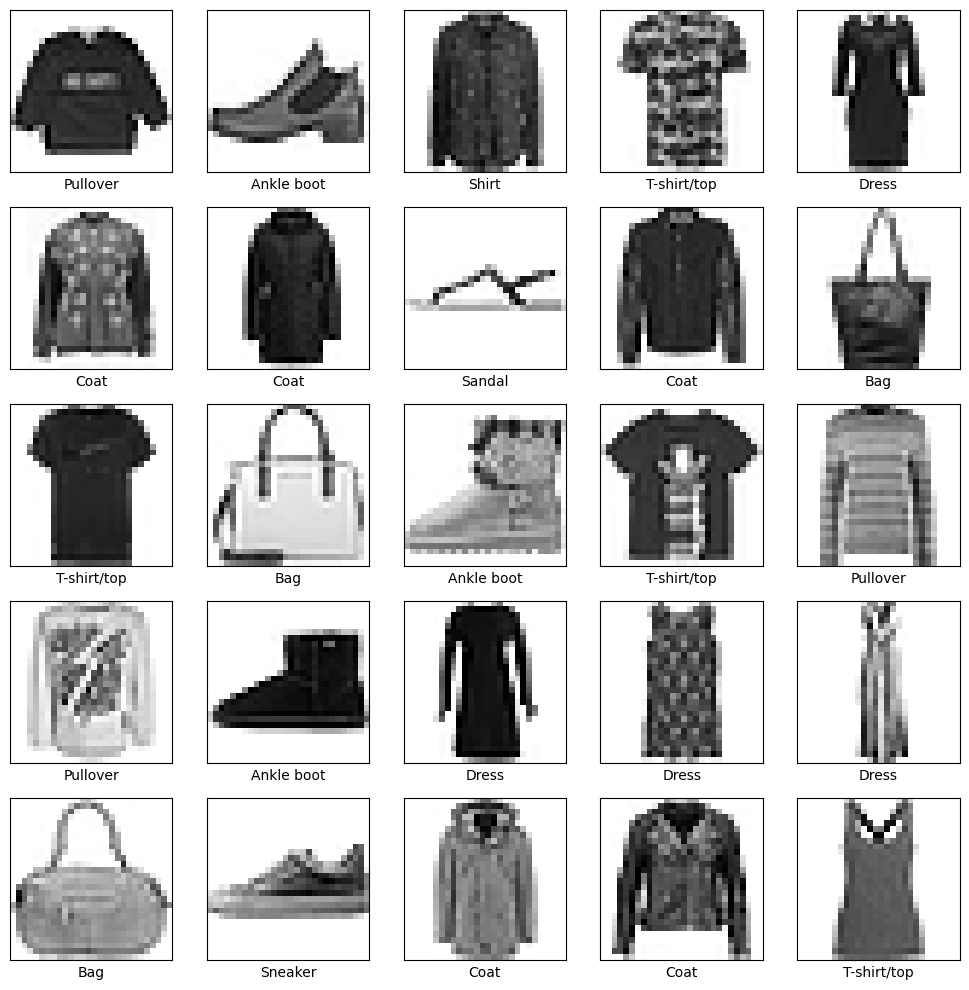

In [26]:
#Show sample images
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[i]])
plt.tight_layout()
plt.show()


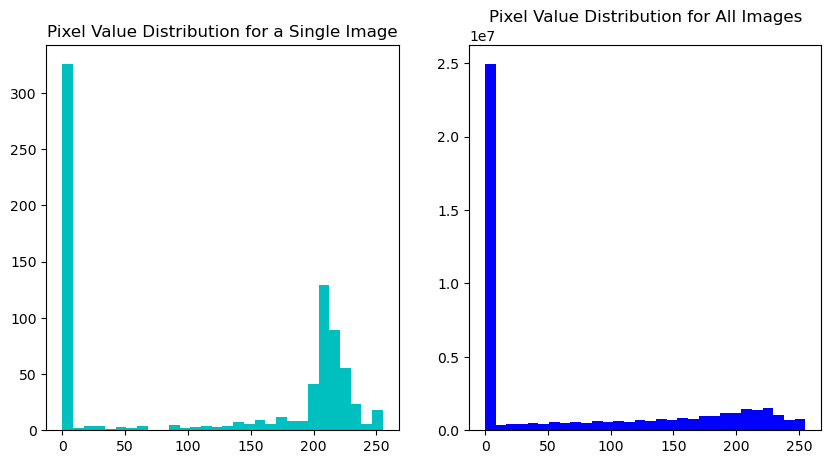

In [27]:
# Visualize the distribution of pixel values 
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(train_images[0].reshape(-1), bins=30, color='c')
plt.title('Pixel Value Distribution for a Single Image')

plt.subplot(1,2,2)
plt.hist(train_images.reshape(-1), bins=30, color='b')
plt.title('Pixel Value Distribution for All Images')
plt.show()


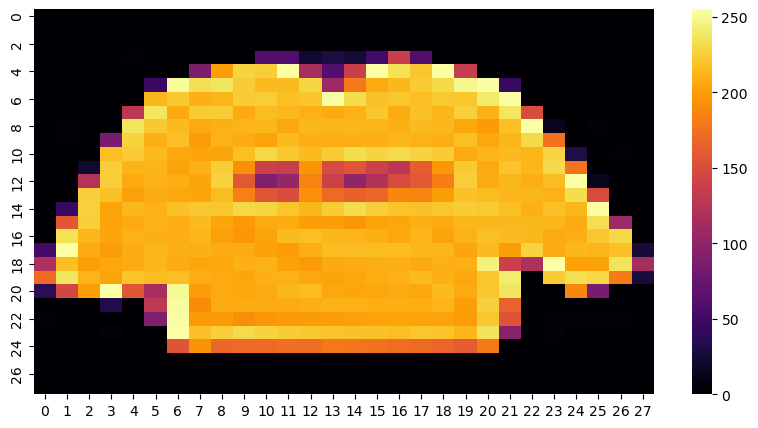

In [28]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_images[0], cmap= "inferno")
plt.show()


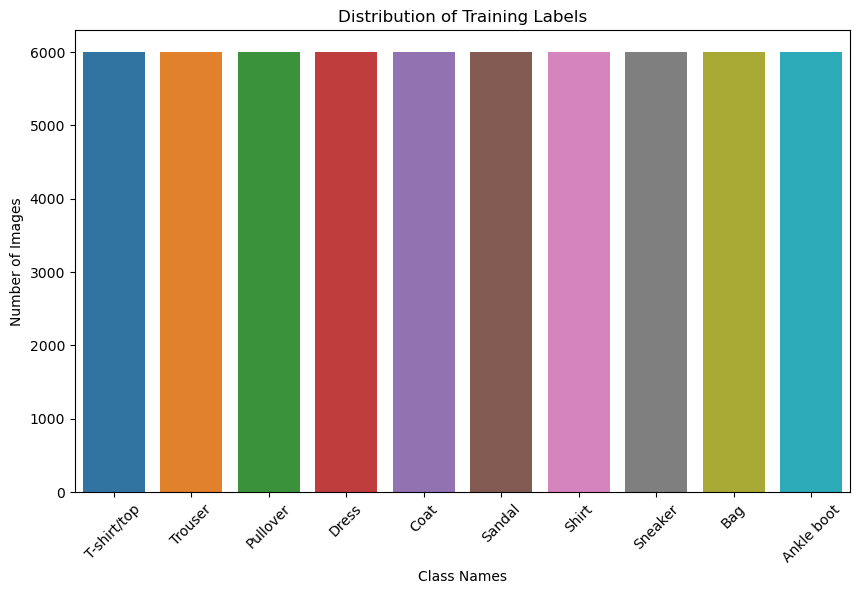

In [29]:
unique, counts = np.unique(train_labels, return_counts=True)
label_counts = dict(zip(unique, counts))
label_counts_df = train_data['label'].value_counts().sort_index()
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

labels_list = []
label_count = []

for label, count in label_counts.items():
    labels_list.append(label_names[label])
    label_count.append(count)

plt.figure(figsize=(10, 6))
sns.barplot(x=labels_list, y=label_count)
plt.title('Distribution of Training Labels')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()



All image type have a total of 6000 versions. From the training dataset

In [30]:


#Convert to tensor and nomalize the image pixel values for training.

train_images_tensor = torch.tensor(train_images, dtype=torch.float32) / 255.0
train_labels_tensor = torch.tensor(train_labels, dtype=torch.int64)

test_images_tensor = torch.tensor(test_images, dtype=torch.float32) / 255.0
test_labels_tensor = torch.tensor(test_labels, dtype=torch.int64)


In [31]:
'''
# Visualize the distribution of pixel values of the nomalized version
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(train_images_tensor[0].reshape(-1), bins=30, color='c')
plt.title('Pixel Value Distribution for a Single Image')

plt.subplot(1,2,2)
plt.hist(train_images_tensor.reshape(-1), bins=30, color='b')
plt.title('Pixel Value Distribution for All Images')
plt.show()
'''

"\n# Visualize the distribution of pixel values of the nomalized version\nplt.figure(figsize=(10, 5))\nplt.subplot(1,2,1)\nplt.hist(train_images_tensor[0].reshape(-1), bins=30, color='c')\nplt.title('Pixel Value Distribution for a Single Image')\n\nplt.subplot(1,2,2)\nplt.hist(train_images_tensor.reshape(-1), bins=30, color='b')\nplt.title('Pixel Value Distribution for All Images')\nplt.show()\n"

**Transformer for Image Classification**

In [32]:
from torch.utils.data import Dataset, DataLoader

class FashionMNISTDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

train_dataset = FashionMNISTDataset(train_images_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = FashionMNISTDataset(test_images_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [33]:
sample_data, sample_label = next(iter(test_loader))
print(sample_data.shape, sample_label)

torch.Size([64, 28, 28]) tensor([0, 1, 2, 2, 3, 2, 8, 6, 5, 0, 3, 4, 4, 6, 8, 5, 6, 3, 6, 4, 4, 4, 2, 1,
        5, 7, 8, 4, 4, 1, 5, 7, 7, 8, 1, 0, 9, 8, 0, 8, 2, 0, 4, 6, 2, 0, 3, 3,
        2, 3, 2, 2, 9, 3, 0, 9, 9, 4, 6, 0, 4, 5, 4, 6])


In [38]:

batch_size = 64

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_encoder_layers, num_classes):
        super(TransformerModel, self).__init__()

        
        self.source_embedding = nn.Linear(input_dim, d_model)
        encoder_layers = TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_encoder_layers)
        self.decoder = nn.Linear(d_model, num_classes)
        
    def forward(self, src):
        
        src = self.source_embedding(src)
        output = self.transformer_encoder(src)
        return self.decoder(output) #.mean(dim=1))

#Best Parameters: lr=0.001, num_encoder_layers=3, d_model=512 loss=0.4334
# Model parameters
input_dim = 28*28 
d_model = 512 
nhead = 8 
num_encoder_layers = 3 
num_classes = 10 


model = TransformerModel(input_dim, d_model, nhead, num_encoder_layers, num_classes)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X = X.view(X.size(0), -1) # Flatten the input
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)


Epoch 1
-------------------------------
loss: 2.390326  [    0/60000]
loss: 1.263555  [ 6400/60000]
loss: 0.886286  [12800/60000]
loss: 0.762679  [19200/60000]
loss: 0.738811  [25600/60000]
loss: 0.627776  [32000/60000]
loss: 0.624067  [38400/60000]
loss: 0.624697  [44800/60000]
loss: 0.474239  [51200/60000]
loss: 0.515396  [57600/60000]
Epoch 2
-------------------------------
loss: 0.695067  [    0/60000]
loss: 0.475766  [ 6400/60000]
loss: 0.650262  [12800/60000]
loss: 0.463361  [19200/60000]
loss: 0.577654  [25600/60000]
loss: 0.404209  [32000/60000]
loss: 0.684128  [38400/60000]
loss: 0.407505  [44800/60000]
loss: 0.515423  [51200/60000]
loss: 0.426130  [57600/60000]
Epoch 3
-------------------------------
loss: 0.629732  [    0/60000]
loss: 0.488983  [ 6400/60000]
loss: 0.399047  [12800/60000]
loss: 0.433098  [19200/60000]
loss: 0.719381  [25600/60000]
loss: 0.515268  [32000/60000]
loss: 0.455073  [38400/60000]
loss: 0.402177  [44800/60000]
loss: 0.465812  [51200/60000]
loss: 0.69

**Hyperparameter Search**

In [36]:

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_encoder_layers, num_classes):
        super(TransformerModel, self).__init__()
        self.source_embedding = nn.Linear(input_dim, d_model)
        encoder_layers = TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_encoder_layers)
        self.decoder = nn.Linear(d_model, num_classes)
        
    def forward(self, src):
        src = self.source_embedding(src)
        output = self.transformer_encoder(src)
        return self.decoder(output)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X = X.view(X.size(0), -1)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

# Hyperparameter Search
learning_rates = [1e-3, 1e-4]
num_encoder_layers_values = [2, 3]
d_model_values = [256, 512]

best_loss = float('inf')
best_params = None

for lr in learning_rates:
    for num_encoder_layers in num_encoder_layers_values:
        for d_model in d_model_values:
            model = TransformerModel(28*28, d_model, 8, num_encoder_layers, 10)
            loss_fn = nn.CrossEntropyLoss()
            optimizer = torch.optim.SGD(model.parameters(), lr=lr)
            
            # Train for a few epochs (for demonstration, using 5 epochs here)
            for epoch in range(5):
                loss = train(train_loader, model, loss_fn, optimizer)
                print(f"lr={lr}, num_encoder_layers={num_encoder_layers}, d_model={d_model}, epoch={epoch+1}, loss={loss:.4f}")

                if loss < best_loss:
                    best_loss = loss
                    best_params = (lr, num_encoder_layers, d_model)

print(f"Best Parameters: lr={best_params[0]}, num_encoder_layers={best_params[1]}, d_model={best_params[2]}, with loss={best_loss:.4f}")


lr=0.001, num_encoder_layers=2, d_model=256, epoch=1, loss=0.8588
lr=0.001, num_encoder_layers=2, d_model=256, epoch=2, loss=0.5524
lr=0.001, num_encoder_layers=2, d_model=256, epoch=3, loss=0.5004
lr=0.001, num_encoder_layers=2, d_model=256, epoch=4, loss=0.4724
lr=0.001, num_encoder_layers=2, d_model=256, epoch=5, loss=0.4541
lr=0.001, num_encoder_layers=2, d_model=512, epoch=1, loss=0.8351
lr=0.001, num_encoder_layers=2, d_model=512, epoch=2, loss=0.5353
lr=0.001, num_encoder_layers=2, d_model=512, epoch=3, loss=0.4857
lr=0.001, num_encoder_layers=2, d_model=512, epoch=4, loss=0.4590
lr=0.001, num_encoder_layers=2, d_model=512, epoch=5, loss=0.4415
lr=0.001, num_encoder_layers=3, d_model=256, epoch=1, loss=0.8707
lr=0.001, num_encoder_layers=3, d_model=256, epoch=2, loss=0.5503
lr=0.001, num_encoder_layers=3, d_model=256, epoch=3, loss=0.4952
lr=0.001, num_encoder_layers=3, d_model=256, epoch=4, loss=0.4658
lr=0.001, num_encoder_layers=3, d_model=256, epoch=5, loss=0.4451
lr=0.001, 

The model architecture... 

First we define the parameters for the model. 
 1. batch size..provide 64 samples in each iteration for training.
2. input_dim input images are of size 28x283.
3. d_model the number of features in the intermediate representation space.
4. nhead the number of self-attention heads in the Transformer.
5.  num_encoder_layers = 3: The number of encoder layers in the Transformer.
num_classes = 10: Assumes there are 10 output classes.
6. loss_fn which is using the cross-entropy loss, which works well for classification tasks.
7. optimizer the Stochastic Gradient Descent (SGD) optimization algorithm with a learning rate of 1e-3.

Model Arch.
 2. Define a neural network model that inherits from PyTorch's base nn.Module class
 3. A linear transformation to convert the input features to a specified d_model dimension, which is the required input dimensionality for the Transformer Encoder.
 4. The encoder_layers defines a single layer of the Transformer Encoder with a specified dimension d_model and number of attention heads nhead.
 5. self.transformer_encoder stacks the encoder layers num_encoder_layers times.
 6. self.decoder: A linear layer that maps the output of the Transformer Encoder to the number of desired output classes num_classes.




Test Error: 
 Accuracy: 88.9%, Avg loss: 0.004752 



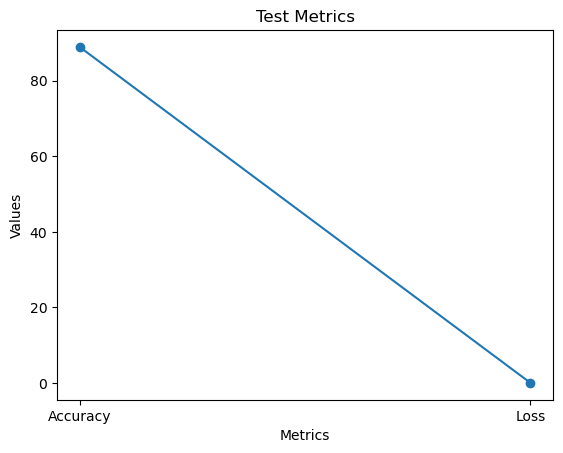

In [39]:
def evaluate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    model.eval()  # Set the model to evaluation mode
    test_loss, correct = 0, 0
    
    with torch.no_grad():  # Don't compute gradients during evaluation
        for X, y in dataloader:
            X = X.view(X.size(0), -1)  # Flatten the input
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

# Evaluate the model
accuracy, loss = evaluate(test_loader, model, loss_fn)

# Optionally, plot the results
import matplotlib.pyplot as plt

# For illustration, we'll just plot accuracy and loss as single values
# In a more detailed setting, you might want to plot accuracy/loss curves over epochs
labels = ['Accuracy', 'Loss']
values = [accuracy*100, loss]

plt.plot(labels, values, marker='o')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Test Metrics')
plt.show()


**Conclusions**

Generally, the FashionMNIST dataset is dealt with using CNN.  However with the explosion of "Transformers"  I wanted to see the benefites of the transformer even thought it was designed for sequential data like text. 

 With Accuracy: 88.9%, Avg loss: 0.004752  for the transformer model with much optimization. Most CNNs would acchive about 94.04% accuracy from this paper "Image Classification Using Multiple Convolutional Neural Networks on the Fashion-MNIST Dataset" by Olivia Nocentini and et al. 
 
The Transformer's accuracy and other metrics of interest are on par with CNN alternatives.  For future work that can be added later.  I would considerder using a vision transformaerr instead of using the typical transformer.  As a Vision Transformer splits an image into fixed-size patches, linearly embeds them, and then processes them with Transformer layers. Would improve accuracy and performance.  I would also leverage pre-trained Transformer models and fine-tune on the FashionMNIST dataset. I did not do much with experimenting with with techniques like dropout, layer normalization, and data augmentation to improve generalization. But that is also another option to generate better results. 

